## Regression

$$

y = a x + b

$$

y: 降水 mm/day

x: Nino3.4 Index (K)

a的单位：mm/day/K

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sacpy as scp # pip install sacpy
import numpy as np

In [2]:
# Nino3.4

sst = xr.open_dataset("../DATA/HadISST_sst_2x2.nc")['sst']


sst = xr.where(np.abs(sst)>100,np.NAN,sst)


ssta = sst.groupby("time.month") - sst.groupby("time.month").mean()

nino34 = ssta.loc["1980":"2015",-5:5,190:240].mean(("lon","lat"))



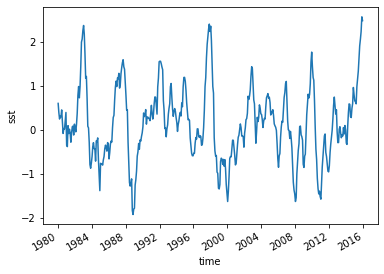

In [3]:
nino34.plot()

In [4]:
sstas = ssta.loc["1980":"2015"]
lin = scp.LinReg(x=nino34,y=sstas)

In [5]:
type(lin)

sacpy.LinReg.LinReg

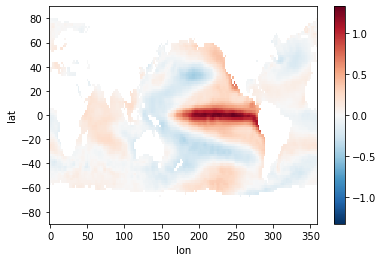

In [6]:
lin.slope.plot()

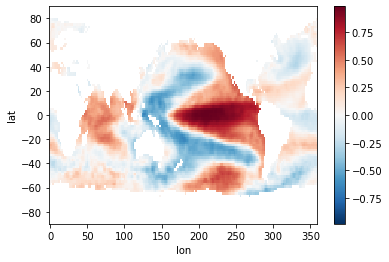

In [7]:
lin.corr.plot() 

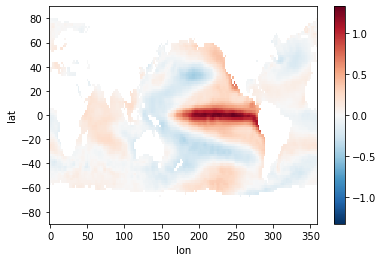

In [8]:
lin.slope.plot()

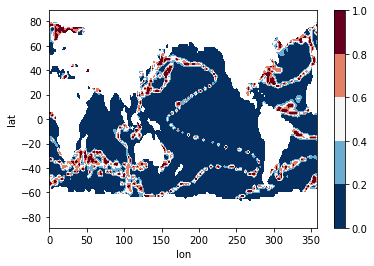

In [9]:
lin.p_value.plot.contourf(cmap="RdBu_r")

In [10]:
lin.slope

<xarray.DataArray (lat: 90, lon: 180)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

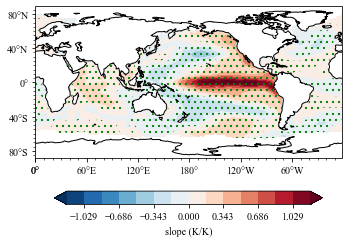

In [18]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator

x = ssta.lon
y = ssta.lat
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(x, y, lin.slope, cmap="RdBu_r", transform=ccrs.PlateCarree(),levels=np.linspace(-1.2,1.2,15),extend="both")
cb = plt.colorbar(m, orientation="horizontal", shrink=0.8)
cb.set_label("slope (K/K)")
ax.coastlines()
xticks = np.arange(0, 361, 60)
yticks = np.arange(-80, 81, 40)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks)
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter())
smallx = 10
smally = 5
ax.xaxis.set_minor_locator(MultipleLocator(smallx))
ax.yaxis.set_minor_locator(MultipleLocator(smally))
# res = ax.contourf(x,
#            y,
#            lin.p_value,
#            levels=[0, 0.05, 1],
#         #    zorder=1, # 优先级 
#            hatches=["..", None],
#            colors="None",
#            transform=ccrs.PlateCarree()) #

# for collection in res.collections:
#     collection.set_linewidth(0.)
#     collection.set_edgecolor("green")
import sacpy.Map # 
ax.sig_plot(x,y,lin.p_value,thrshd=0.05,marker="..",color="green")

In [16]:
y

<xarray.DataArray 'lat' (lat: 90)>
array([-89., -87., -85., -83., -81., -79., -77., -75., -73., -71., -69., -67.,
       -65., -63., -61., -59., -57., -55., -53., -51., -49., -47., -45., -43.,
       -41., -39., -37., -35., -33., -31., -29., -27., -25., -23., -21., -19.,
       -17., -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,   1.,   3.,   5.,
         7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,
        31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,  49.,  51.,  53.,
        55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,
        79.,  81.,  83.,  85.,  87.,  89.])
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0

## Homework

计算Nino3.4指数（x）与全球500hPa位势高度（y）的斜率，并把显著性大于0.9的地方打点。
说出这个斜率代表的物理意义。
搜索相关系数的定义，并画出Nino3.4指数与500hPa位势高度（y）相关系数，并把显著性大于0.9的地方打点。